# A multiple linear regression

## Introduction

Multiple linear regression (MLR) helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science, this technique is useful because it allows for the comparison of more than one variable to the variable being measured against. It provides the opportunity for much more thorough and flexible analysis. 

This is an analysis of a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. Previously, you worked on finding a single variable that predicts sales. Now, expand this analysis to include other variables that can help target marketing efforts.

To address the business' request, conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

**Import packages**

Import relevant Python libraries and modules.

In [9]:
# Import libraries and modules.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

**Load dataset**

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
path = os.getcwd()

In [5]:
csv_filename = r"marketing_sales_data.csv"

In [6]:
fullpath = os.path.join(path, csv_filename)

In [7]:
# import the data
data = pd.read_csv(fullpath)

In [8]:
# Display the first five rows.
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

### List Data features


An exploratory data analysis (EDA) to get familiar with the data and prepare it for modeling. Also, identify each variable, its limitations, such as NAs, and identifying the operations requiread to clean the data.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

### Plot a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

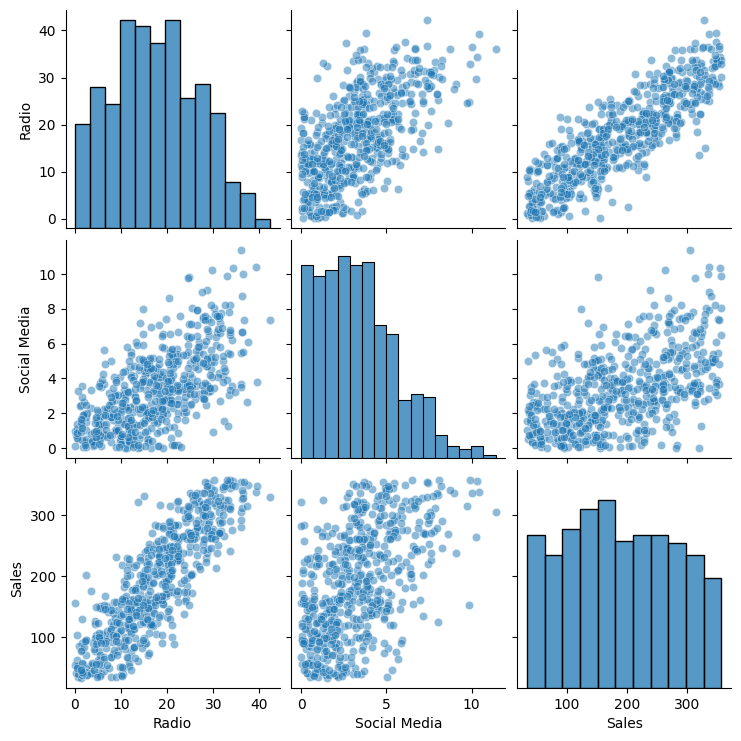

In [20]:
# Create a pairplot of the data.
sns.pairplot(data,plot_kws={'alpha': 0.5});
#plt.tight_layout();
#plt.show()

**Variables with a linear relationship with `Sales`** Excluded variables in the plot

The variable `Radio` has a linear relationship with `Sales`. To some extend, the variable `Social Media` has it but it also has more viariation.
Both `Radio` and `Sales` will be used as independent variables to estimate `Sales`.

The categorical variables `TV` and `Influencer` were automatically excluded because the pairplot requires continuous variables only.

### Calculate the Mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [22]:
# Calculate the mean sales for each TV category. 
print(data.groupby('TV')['Sales'].mean())
# Print an empty space for clarity
print('')
# Calculate the mean sales for each Influencer category. 
print(data.groupby('Influencer')['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


**The categorical variables** usefulness as `Sales` predictors

The average Sales for `TV` categories are remarkable different. `High` promotions is considerable higher that `Medium` and `Low`. Might be a useful predictor for `Sales`.

The `Influencer` categorical variables have quite similar mean `Sales` values. Might be a weak `Sales` predictor.

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [23]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [25]:
# Rename all columns in data that contain a space. 
data = data.rename(columns = {'Social Media':'Social_Media'})

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [27]:
# Define the OLS formula
ols_formula = 'Sales ~ C(TV) + Radio'

# Create an OLS model
OLS =  ols(formula = ols_formula, data = data)

# Fit the model
model = OLS.fit()

# Save the results summary
model_results = model.summary()

# Display the model results
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.63e-288
Time:                        20:39:32   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which independent variables did you choose for the model, and why?



`TV` and `Radio` because those variables seems highly correlated to `Sales`

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for the model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) previously selected with `Sales` to check the linearity assumption. Use the pairplot to verify the linearity assumption or create new scatterplots comparing the variables of interest.

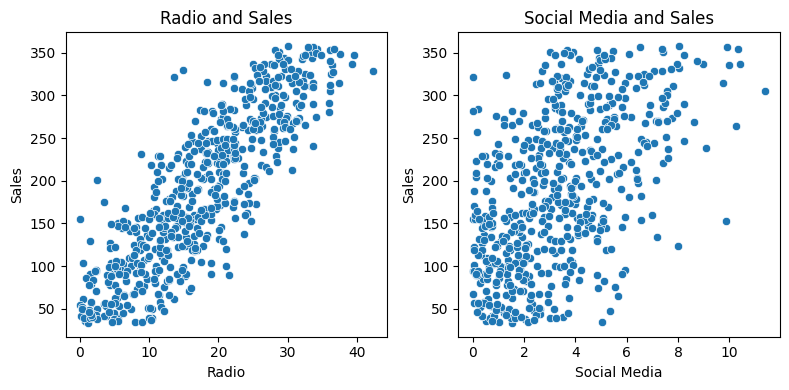

In [29]:
# Create a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1,2,figsize=(8,4))

# Radio vs Sales in the space 0
sns.scatterplot(x=data['Radio'], y=data['Sales'],ax=axes[0]) 
# Add the title
axes[0].set_title("Radio and Sales")

# Social Media vs Sales in the space 1
sns.scatterplot(x=data['Social_Media'], y=data['Sales'],ax=axes[1])
# Add the title
axes[1].set_title("Social Media and Sales")
# Add the title, change Social Media instead of Social_Media
axes[1].set_xlabel("Social Media")

# adding nice space
plt.tight_layout()

**The linearity assumption**

Yes. There is linear correlation between the independent variables and `Sales`

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

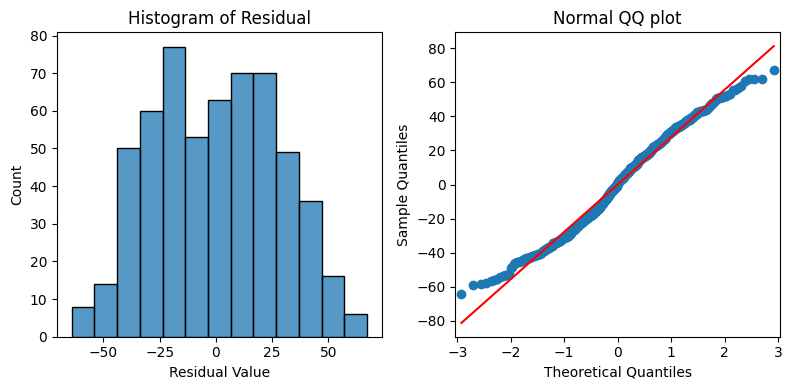

In [30]:
# Calculate the residuals.
residuals = model.resid

# create the empty boxes for the plots 
fig, axes = plt.subplots(1,2,figsize=(8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax=axes[1])

# labeling titles
axes[0].set_title("Histogram of Residual")
axes[1].set_title("Normal QQ plot")

# labelling x titles
axes[0].set_xlabel("Residual Value")
axes[1].set_xlabel("Theoretical Quantiles")

# adding nice space
plt.tight_layout()

# show the plot
plt.show()

**The normality assumption**

The histogram of the residuals are approximately normal distributed, which supports that the normality assumption is met for this model. The residuals on the QQ plot form a straight line, further supporting that this assumption is met.

### Model assumption: Constant variance (aka. Homoscedasticity)

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

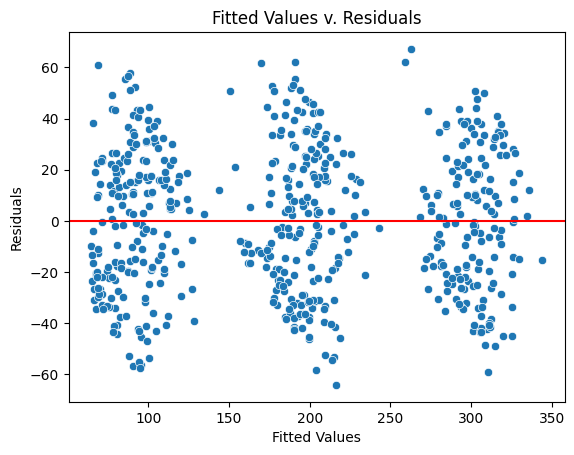

In [31]:
# Create a scatterplot with the fitted values from the model and the residuals
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Labeling the x-axis
fig.set_xlabel("Fitted Values")
# Labeling the y-axis
fig.set_ylabel("Residuals")
# Adding a title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0
fig.axhline(0, color='red')

plt.show()


**The constant variance assumption**

The fitted values are in three groups because the categorical variable `TV` is dominating in this model, meaning that `TV` is the major factor that decides the sales. However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check the model's no multicollinearity assumption.

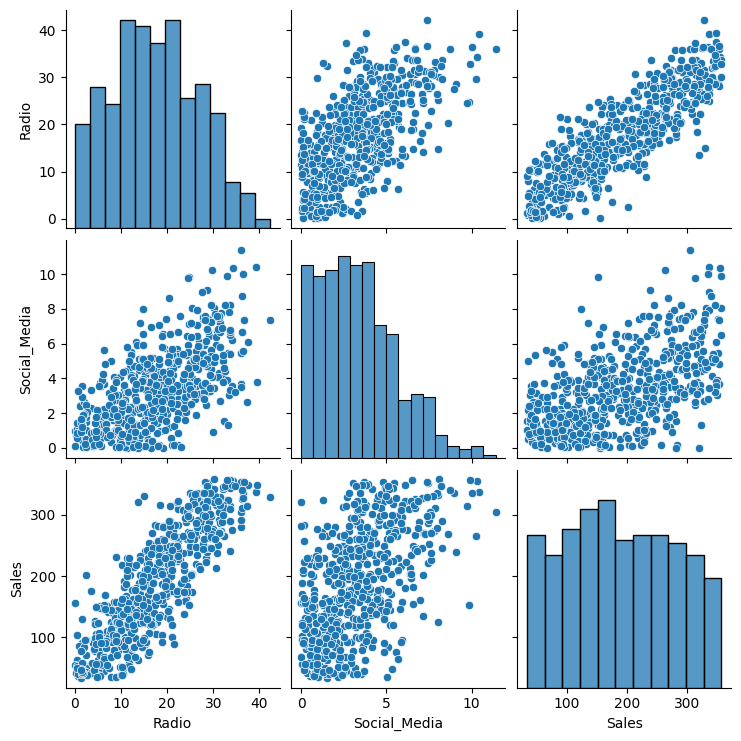

In [32]:
# Create a pairplot of the data.
sns.pairplot(data);

In [34]:
# Calculate the Variance Inflation Factor (VIF optional)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[['Radio', 'Social_Media']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

df_vif

,VIF
Radio,5.170922
Social_Media,5.170922


**The no multicollinearity assumption**

The model only has one continous independent variable, meaning there are no multicollinearity issues. 

If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is **5.17** for each variable, indicating high multicollinearity.

## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [36]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.63e-288
Time:                        20:39:32   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation of the model's R-squared**

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. Which means that the model explains **90.4%** of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

### Interpret model coefficients

With the model fit evaluated, look at the coefficient estimates and the uncertainty of these estimates. 

Display the OLS regression results.

In [37]:
# Display the model results summary
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          1.63e-288
Time:                        20:39:32   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The model coefficients**

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

**The  linear equation** of the relationship between `Sales` and the independent variables

$\text{Sales} = \beta_{0} + \beta_{1}*X_{1}+ \beta_{2}*X_{2}+ \beta_{3}*X_{3}$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

**Intepretation of the coefficient estimate** and coefficients' statistically significance

The default `TV` category for the model is `High` since there are coefficients for the other two `TV` categories, `Medium` and `Low`. Because the coefficients for the `Medium` and `Low` `TV` categories are negative, that means the average of sales is lower for `Medium` or `Low` `TV` categories compared to the `High` `TV` category when `Radio` is at the same level.

For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average compared to a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for `Radio` is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance that the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a `Low` `TV` promotion is chosen instead of a `High` `TV` promotion.

**Interpretation of the beta coefficients**

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Further exploration**

Potential areas to explore include:

Providing the business with the estimated sales given different TV promotions and radio budgets
Additional plots to help convey the results, such as using the seaborn `regplot()` to plot the data with a best fit regression line.

**Improvements**

Given how accurate `TV` was as a predictor, the model could be improved by getting a more granular view of the `TV` promotions, such as by considering more categories or the actual `TV` promotional budgets.

Furthermore, additional variables, such as the location of the marketing campaign or the time of year, could increase model accuracy. 

## Conclusion

**Key takeaways**

* Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
* Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
* Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.

**Reporting results**

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a `Low` `TV` promotion is 154.2971 lower on average than a `high` `TV` promotion given the same `Radio` promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is $0.000$, meaning all coefficients are statistically significant at $p=0.05$. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. 

For example, there is a $95\%$ chance the interval $[-163.979,-144.616]$ contains the true parameter of the slope of $\beta_{TVLow}$, which is the estimated difference in promotion sales when a low TV promotional budget is chosen instead of a high TV promotion budget.

**Findings for external stakeholders**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$75.3120$ million (95% CI $[-82.431,-68.193])$, and switching from a high to low TV promotional budget reduces sales by $\$154.297$ million (95% CI $[-163.979,-144.616])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.9669$ million increase in sales (95% CI $[2.551,3.383]$).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales. 


#### References

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).